In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/Position_Salaries.csv')

In [ ]:
#split x,y 
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<function matplotlib.pyplot.show>

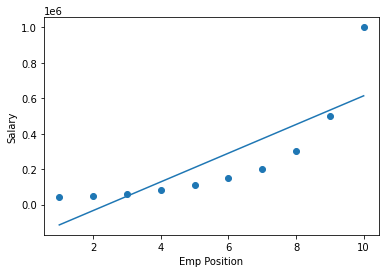

In [ ]:
#plot actual data points and predicted values/regression line
plt.scatter(X,y)
plt.plot(X,lin_reg.predict(X))
plt.xlabel("Emp Position")
plt.ylabel("Salary")
plt.show

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


<function matplotlib.pyplot.show>

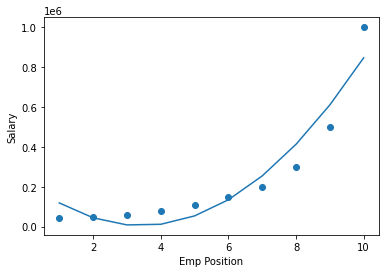

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
'''
transorm x column to x^2, x^3 ....
then use new dataset to train 
'''
poly_reg = PolynomialFeatures(degree=2) #object of polynomial features
X_poly = poly_reg.fit_transform(X) #transfrom original data
print(X_poly)
lin_reg2 = LinearRegression() 
lin_reg2.fit(X_poly,y) #train new model on tranformed data

# plot for transformed data
plt.scatter(X,y)
plt.plot(X,lin_reg2.predict(X_poly))
plt.xlabel("Emp Position")
plt.ylabel("Salary")
plt.show

In [ ]:
'''
to find best degree for given data
use bayes information critera
BIC = nlog(sum of residuals) + klog(n) 
'''
from sklearn.preprocessing import PolynomialFeatures
models = [] # save model of each degree
poly_data = [] # save new transformed data for each degree
for poly_degree in range (1,5): # for 1 to 5 degree 
  poly_reg = PolynomialFeatures(degree=poly_degree) 
  X_poly = poly_reg.fit_transform(X) # save new models 
  poly_data.append(X_poly) # save new data
  new_lin_reg = LinearRegression()
  new_lin_reg.fit(X_poly,y)
  models.append(new_lin_reg)

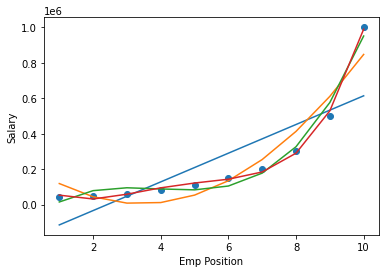

In [ ]:
plt.scatter(X,y)
for model, x_data in zip(models, poly_data):
  plt.plot(X,model.predict(x_data))
  plt.xlabel("Emp Position")
  plt.ylabel("Salary")
  plt.show